In [105]:
# Python API Challenge
import requests
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
from citipy import citipy

api_key = "1b048a9882a8c204a4a9153abcd5f515"

output_data_file = "output_data/cities.csv"

In [106]:
lats_lngs = []
cities = []

latitudes = np.random.uniform(low=-90.000, high=90.000, size =1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size =1500)
lats_lngs = zip(latitudes, longitudes)

In [107]:
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

In [108]:
len(cities)

620

In [109]:
city_name = []
city_lat = []
city_lng = []
city_temp = []
city_hum = []
city_cloud = []
city_wind = []

for city in cities:
    url = "https://api.openweathermap.org/data/2.5/weather?q={}&apikey={}".format(city, api_key)
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    try:
        city_name.append(weather_json['name'])
        city_lat.append(weather_json['coord']['lat'])
        city_lng.append(weather_json['coord']['lon'])
        city_temp.append(weather_json['main']['temp'])
        city_hum.append(weather_json['main']['humidity'])
        city_cloud.append(weather_json['clouds']['all'])
        city_wind.append(weather_json['wind']['speed'])
    except KeyError:
        None

In [128]:
city_far = [((x  - 273.15) * 9/5 + 32) for x in city_temp]

city_info = {
    'City': city_name,
    'Latitude': city_lat,
    'Longitude': city_lng,
    'Temperature': city_far,
    'Humidity': city_hum,
    'Cloudiness': city_cloud,
    'Wind Speed': city_wind
}

city_df = pd.DataFrame(city_info)

In [129]:
city_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Ushuaia,-54.81,-68.31,42.8000,56,75,12.90
1,Matay,28.42,30.79,81.6692,29,0,4.73
2,Manavgat,36.79,31.44,69.8000,73,20,2.60
3,Kaitangata,-46.28,169.85,48.9920,91,100,0.89
4,San Francisco,1.17,-76.88,71.6000,49,90,3.60


In [142]:
len(city_df['City'])

563

## Temperature (F) vs. Latitude

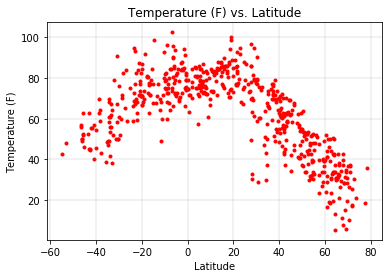

In [143]:
plt.scatter(city_df['Latitude'],city_df['Temperature'],marker='.', color='red')
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(color='gray', linestyle='-', linewidth=0.2)

## Humidity (%) vs. Latitude

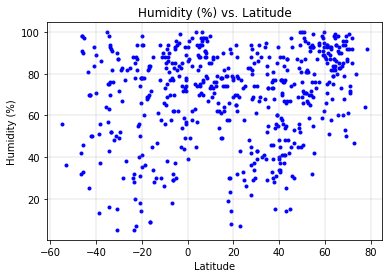

In [144]:
plt.scatter(city_df['Latitude'],city_df['Humidity'],marker='.', color='blue')
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color='gray', linestyle='-', linewidth=0.2)

## Cloudiness (%) vs. Latitude

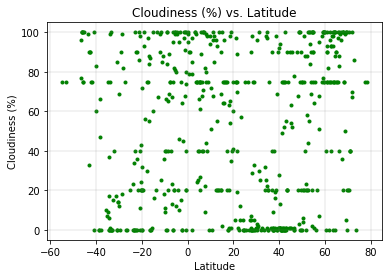

In [145]:
plt.scatter(city_df['Latitude'],city_df['Cloudiness'],marker='.', color='green')
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color='gray', linestyle='-', linewidth=0.2)

## Wind Speed (mph) vs. Latitude

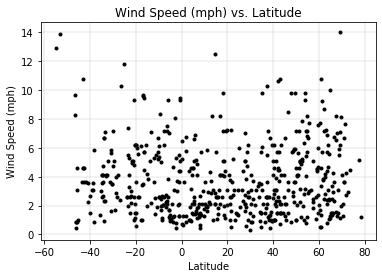

In [146]:
plt.scatter(city_df['Latitude'],city_df['Wind Speed'],marker='.', color='black')
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(color='gray', linestyle='-', linewidth=0.2)